<a href="https://colab.research.google.com/github/siddharthbharthulwar/math_ia/blob/master/stochastic_gradient_descent_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

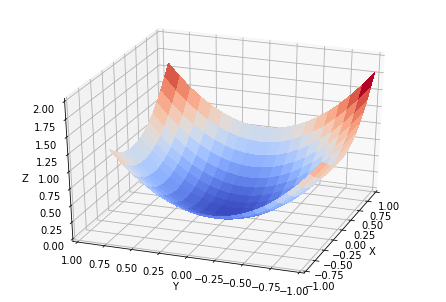

In [4]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def cost_function(x):
    return x[0]**2 + x[1]**2

def gradient_cost_function(x):
    return np.array([2*x[0], 2*x[1]])

nb_steps = 20
x0 = np.array([0.8, 0.8])
learning_rate = 0.1

def gen_line():
    x = x0.copy()
    data = np.empty((3, nb_steps+1))
    data[:, 0] = np.concatenate((x, [cost_function(x)]))
    for t in range(1, nb_steps+1):
        grad = gradient_cost_function(x)
        x -= learning_rate * grad
        data[:, t] = np.concatenate((x, [cost_function(x)]))
    return data

def update_line(num, data, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    return line

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Plot cost surface
X = np.arange(-0.5, 1, 0.1)
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = cost_function((X, Y))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Optimize
data = gen_line()

# Creating line objects
# NOTE: Can't pass empty arrays into 3d version of plot()
line = ax.plot(data[0, 0:1], data[0, 0:1], data[0, 0:1], 'rx-', linewidth=2)[0]

# Setting the axes properties
ax.view_init(30, -160)

ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 2.0])
ax.set_zlabel('Z')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_line, nb_steps+1, fargs=(data, line), interval=200, blit=False)

#line_ani.save('gradient_descent.gif', dpi=80, writer='imagemagick')

from matplotlib import rc
rc('animation', html='jshtml')

line_ani